<h1>In this document, we will follow a supervised learning approach for classifying the events to normal and anomalies.</h1> (Outlier is a synonym for Anomaly in Data Science language)

<p>The dataset has 8 features consisting of few outliers in it.</p>

<b>What are we looking for?</b> : In anomaly detection, the Recall is very important, even more important than Accuracy. This is because, the percentage of an outlier in any dataset is generally very small. And that "very small" amount of anomaly should be detected correctly as well, which is determined by Recall rate. You will see in the models below.

To end this dosument, we will compare the results of all the three approaches on the basis of their Recall and Accuracy

Author: Kopal Soni<br>
E-mail: soni.kopal@gmail.com<br>
LinkedIn: https://www.linkedin.com/in/kopal-soni-72992810b/<br>
Github: https://github.com/ksoni5<br>
Importing the required libraries<br>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
"""
Datasets
"""
data = pd.read_csv('Dataset/experiment_contains_anomalies.csv')

"""Random Split"""
X = data.drop(['Sds_Armed', 'Anomaly_Tag'], axis=1)
Y = pd.DataFrame(data['Anomaly_Tag'], columns=['Anomaly_Tag'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

In [3]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.7957,6.1964,508.57,875.40,0.43922,1.5473,57.021,56.914
1,1.7851,6.1508,503.90,867.18,0.43947,1.3525,53.658,58.856
2,1.7760,6.1173,499.62,860.56,0.42528,1.3391,52.551,69.101
3,1.7641,6.0799,494.07,851.51,0.42802,1.3679,51.228,75.935
4,1.7525,6.0333,486.73,840.86,0.40701,1.3128,47.228,72.784


In [4]:
Y.head()

,Anomaly_Tag
0,0
1,0
2,0
3,0
4,0


<h2>Let's start with Naive Bayes which belongs to linear model class

In [5]:
gaussianNB = GaussianNB()
gaussianNB.fit(x_train, y_train)
gnbPredict = gaussianNB.predict(x_test)

print("Accuracy Score: {:.3f}% Recall Score: {:.3f}% Precision : {:.3f}% and F1 Score: {:.3f}%"
      .format(accuracy_score(y_test, gnbPredict)*100, recall_score(y_test, gnbPredict)*100, 
              precision_score(y_test, gnbPredict)*100, f1_score(y_test, gnbPredict)*100))

Accuracy Score: 84.819% Recall Score: 33.247% Precision : 45.168% and F1 Score: 38.302%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


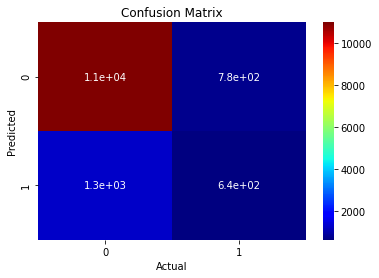

In [6]:
sns.heatmap(confusion_matrix(y_test, gnbPredict), annot=True, cmap='jet')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

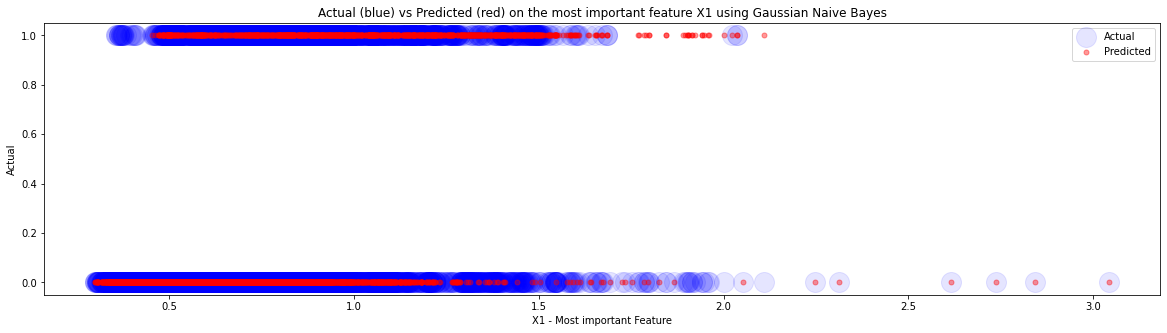

In [7]:
fig = plt.figure(figsize=(20,5))
plt.scatter(x_test.iloc[:,0], y_test, color="blue", marker='o', s=400 , alpha=0.1, label='Actual')
plt.scatter(x_test.iloc[:,0], gnbPredict, color="red", marker='.', s=100, alpha=0.4, label='Predicted')
plt.title("Actual (blue) vs Predicted (red) on the most important feature X1 using Gaussian Naive Bayes")
plt.xlabel("X1 - Most important Feature")
plt.ylabel("Actual")
plt.legend()
plt.show()

We can observe in the above plot that some of the red dots for outlier (1) are wrongly predicted.

Recall from Gaussian NB model (~ 33%) wasn't acceptable at all. From the confusion matrix, we can see that a lot of normal data points were corretly predicted but in 'Anomaly detection', correct prediction of an anomaly is as important as normal data point. And so, the ~85% accuracy doesn't mean that the model is accepatble. We need to look for a model which can Recall both, normal as well as outliers, more accurately.

<h2>Let's check out the champs, Random Forest which belongs to ensemble class.

In [8]:
"""
Random Forest Classifier
"""

rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(x_train, y_train)
rfPredict = rf.predict(x_test)

print("Accuracy Score: {:.3f}% Recall Score: {:.3f}% Precision : {:.3f}% and F1 Score: {:.3f}%"
      .format(accuracy_score(y_test, rfPredict)*100, recall_score(y_test, rfPredict)*100, 
              precision_score(y_test, rfPredict)*100, f1_score(y_test, rfPredict)*100))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy Score: 98.568% Recall Score: 91.082% Precision : 98.715% and F1 Score: 94.745%


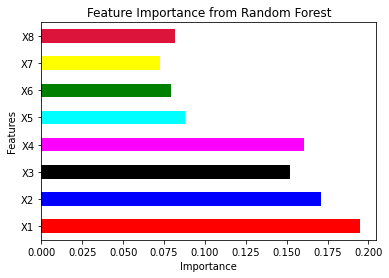

In [9]:
feature_importance = pd.Series(rf.feature_importances_, index = x_train.columns)
feature_importance.plot(kind='barh', color=['red', 'blue', 'black', 'magenta', 'cyan', 'green', 'yellow', 'crimson'])
plt.title('Feature Importance from Random Forest')
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

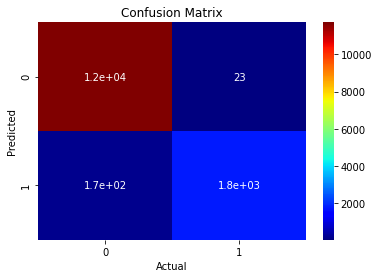

In [10]:
sns.heatmap(confusion_matrix(y_test, rfPredict), annot=True, cmap="jet")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

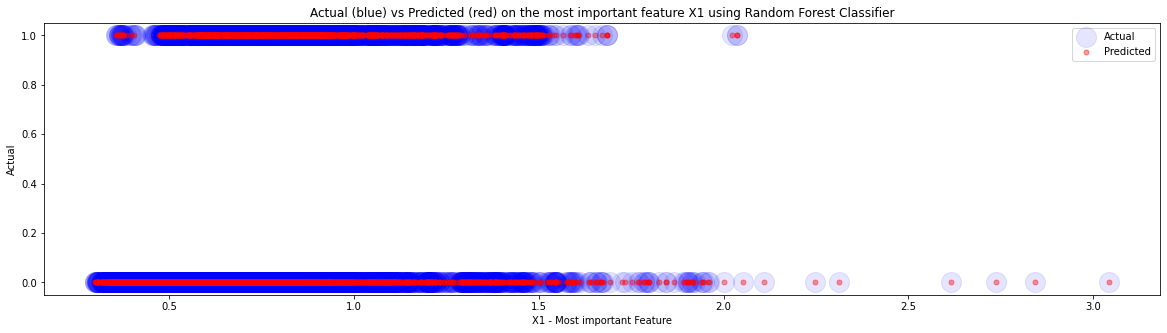

In [11]:
"""
The scatter plot shows the actual vs predicted data points for feature 'X1'
"""
fig = plt.figure(figsize=(20,5))
plt.scatter(x_test.iloc[:,0], y_test, color="blue", marker='o', s=400 , alpha=0.1, label='Actual')
plt.scatter(x_test.iloc[:,0], rfPredict, color="red", marker='.', s=100, alpha=0.4, label='Predicted')
plt.title("Actual (blue) vs Predicted (red) on the most important feature X1 using Random Forest Classifier")
plt.xlabel("X1 - Most important Feature")
plt.ylabel("Actual")
plt.legend()
plt.show()

<h4> Woah! Impressive, aren't they. This model shows that very few outliers and normal data points were incorrectly detected.

<H3>Well we do not have much to say. The results are clearly evident as the Random Forests gave us amazing results.